## Error Propagation

This exercise is useful to practice applying the error propagation formula for a function of several highly correlated random variables, mentioned [here](https://mdonega.github.io/hep-datanalysis-jb/errors.html#function-of-several-variables).\
First of all, run the following cell in order to produce highly correlated samples for three variables. 

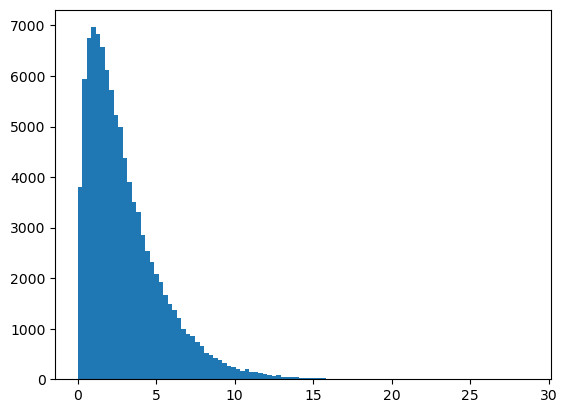

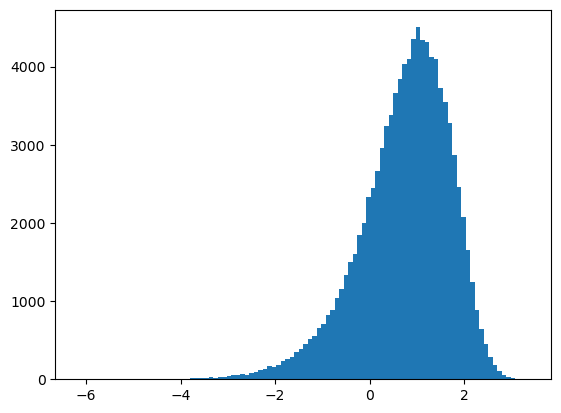

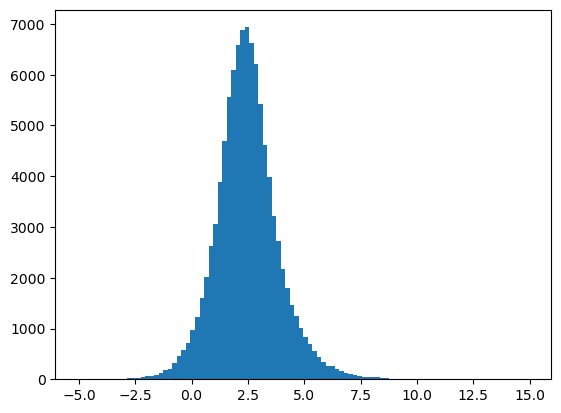

In [28]:
from scipy.stats import chi2, expon
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(100)

nevs = 100000
dof = 3
pdf1 = chi2(dof)
sample1 = pdf1.rvs(nevs)
plt.hist(sample1, bins=100)
plt.show()

sample2 = np.log(sample1)
plt.hist(sample2, bins=100)
plt.show()

pdf3 = expon(np.mean(sample2))
sample3 = pdf3.rvs(nevs) + sample2
plt.hist(sample3, bins=100)
plt.show()

Calling x, y and z the first, second and third variables produced, the task consists in computing the following function

$$f(x, y, z) = \frac{4xy(x+y)^2}{z}$$

and propagate the uncertainty accordingly. 

If you want, instead of manually computing and writing the functions for the partial derivatives, you can use the automatic differentiation implemented in the ```pytorch``` package (which, in case, you would need to install in your environment). See the following example:

```
import torch

def f(x, y):
    c = x + y
    d = c**2
    return x * d

x = torch.tensor([3.0], requires_grad=True)
y = torch.tensor([-1.0], requires_grad=True)
f_val = f(x, y)
f_val.backward()
print('df/dx:', x.grad)
print('df/dy:', y.grad)
```

In [29]:
df = pd.DataFrame({"x": sample1, "y": sample2, "z": sample3})
df.corr()

,x,y,z
x,1.000000,0.846327,0.588106
y,0.846327,1.000000,0.694877
z,0.588106,0.694877,1.000000


In [30]:
import torch

def f(x, y, z):
    return (4*x*y*(x+y)**2)/z

In [31]:
means = [np.mean(s) for s in [sample1, sample2, sample3]]
xyz = [torch.tensor([m], requires_grad=True) for m in means]
f_res = f(*xyz)

In [32]:
f_res

tensor([49.9011], dtype=torch.float64, grad_fn=<DivBackward0>)

In [33]:
f_res.backward()

In [34]:
corr = df.corr()
stds = list(df.std())

f_var = 0
for i in range(3):
    for j in range(3):
        f_var += corr.iloc[i, j] * stds[i] * stds[j] * xyz[i].grad * xyz[j].grad

In [35]:
np.sqrt(f_var)

tensor([172.5115], dtype=torch.float64)